In [1]:
import tensorflow as tf

print(tf.__version__)

import os
import pandas as pd
import numpy as np
from skimage.io import imread_collection
import skimage.io
import skimage.color
import skimage.transform
from platform import python_version
import matplotlib.pyplot as plt

print(tf.__version__)
print(python_version())

from keras import layers
#from keras.applications import DenseNet121   #우리는 ResNet50을 사용하려 한다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import random
import pydicom
import cv2

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import backend as K

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom as dicom
import glob
import os
from tqdm import tqdm
from PIL import Image

folder_name = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\"

# Constants
SEED = 42
NO_CHANNEL = 3
BATCH_SIZE = 16

PATH= folder_name

RESNET_WEIGHT_FULLPATH = f'{folder_name}resnet50_weights_tf.h5'
TRAIN_CSV_FULLPATH = 'C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\stage_2_train.csv'
#TEST_CSV_FULLPATH = 'C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\archive\\MIL_test.csv'
TRAIN_IMG_PATH = PATH + 'train\\'
TEST_IMG_PATH = PATH + 'test\\'

random.seed(SEED) 

2.9.1
2.9.1
3.9.11


In [ ]:
# should be the same as the images imported
print("학습/검증 데이터셋에서 정상 이미지 갯수 : " , len(normal_filenames))

# 불량하거나 구분할 수 없는 CT 이미지 제거

In [8]:
# 출혈 이미지 데이터셋 경로
col_dir = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified\\hemorrhage\\*.jpg" 
# 이미지 갯수 확인
images = imread_collection(col_dir)

hemorrhage_size = len(images)

print(f"뇌출혈 이미지셋 크기 : {hemorrhage_size} 장",)

뇌출혈 이미지셋 크기 : 109428 장


In [10]:
# 정상 이미지 데이터셋 경로
col_dir = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified\\normal\\*.jpg" 
# 이미지 갯수 확인
images = imread_collection(col_dir)

normal_size = len(images)

print(f"정상인 이미지셋 크기 : {normal_size} 장",)

정상인 이미지셋 크기 : 109428 장


In [13]:
from os import remove

In [14]:
import os
hem_path = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified\\hemorrhage"
nor_path = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified\\normal"

#뇌출혈 이미지에서 15KB 미만 파일들(뇌가 아주 작게 잘린 말단면들) 제거
with os.scandir(hem_path) as it:
    for entry in it:
        if entry.stat().st_size//1024 < 15:
            remove(f"{hem_path}\\{entry.name}")

# 삭제한 이미지 갯수 출력
col_dir = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified\\hemorrhage\\*.jpg" 
images = imread_collection(col_dir)
hemorrhage_size_rest = len(images)
print(f"뇌출혈 이미지셋 크기 : {hemorrhage_size-hemorrhage_size_rest} 장",)

뇌출혈 이미지셋 크기 : 5814 장


In [16]:
#정상 이미지에서 15KB 미만 파일들(뇌가 아주 작게 잘린 말단면들) 제거
with os.scandir(nor_path) as it:
    for entry in it:
        if entry.stat().st_size//1024 < 15:
            remove(f"{nor_path}\\{entry.name}")

# 삭제한 이미지 갯수 출력
col_dir = "C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified\\normal\\*.jpg" 
images = imread_collection(col_dir)
normal_size_rest = len(images)
print(f"뇌출혈 이미지셋 크기 : {normal_size-normal_size_rest} 장",)

뇌출혈 이미지셋 크기 : 22779 장


# 학습

In [2]:
SIZE = 224
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2 )
train_generator = train_datagen.flow_from_directory('C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified', subset="training", shuffle = True, target_size=(SIZE,SIZE), batch_size=BATCH_SIZE, class_mode = 'binary' )
validation_generator = train_datagen.flow_from_directory('C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\train\\classified', subset="validation", shuffle = True, target_size=(SIZE,SIZE), batch_size=BATCH_SIZE ,class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255 , validation_split=0.0,)
test_generator = test_datagen.flow_from_directory('C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\test\\classified', shuffle = False, target_size=(SIZE,SIZE), batch_size=BATCH_SIZE,class_mode = 'binary')

Found 152212 images belonging to 2 classes.
Found 38051 images belonging to 2 classes.
Found 2210 images belonging to 2 classes.


In [3]:
IMAGE_SIZE = (SIZE,SIZE)
NUM_CLASSES = 1
METRICS = [tf.keras.metrics.BinaryAccuracy()]
tf.random.set_seed(2)

In [4]:
#데이터 증강
data_augmentation = tf.keras.Sequential([
   tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
   tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
   #tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
   #tf.keras.layers.experimental.preprocessing.RandomWidth(0.2)
])

In [86]:
base_model = tf.keras.applications.ResNet50V2(include_top = False , weights="imagenet")

In [87]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(16, 7, 7, 2048)


### 특징 추출

#### 컨볼루션 베이스 모델 고정하기

In [88]:
base_model.trainable = False

In [89]:
# 기본 모델 아키텍처를 살펴봅니다.
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_10[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                      

#### 분류 층을 맨 위에 추가하기
##### 특성 블록에서 예측을 생성하기 위해 tf.keras.layers.GlobalAveragePooling2D 레이어를 사용하여 특성을 이미지당 하나의 1280-요소 벡터로 변환하여 5x5 공간 위치에 대한 평균을 구합니다.

In [90]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 2048)


In [91]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(16, 1)


In [92]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')(prediction_layer(x))
model = tf.keras.Model(inputs, outputs)

##### 모델 컴파일

In [93]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=METRICS)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [94]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                           

In [95]:
len(model.trainable_variables)

4

In [33]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_generator)

2379/2379 [==============================] - 78s 32ms/step - loss: 1.0174 - accuracy: 0.5447


In [34]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.02
initial accuracy: 0.54


In [96]:
import wandb
import tensorflow as tf

import time
date = time.strftime('%c', time.localtime(time.time()))

%env WANDB_API_KEY=43c7c9707887ea6277ac1ff15c5e47f45a42c1ac

import wandb
from wandb.keras import WandbCallback
wandb.login()

wandb.init(project="aiinternship", entity="pypyp" , name = "[ResNetV2_tuning], " + date , config = {"learning_rate": base_learning_rate,"epochs": initial_epochs,"batch_size": BATCH_SIZE,"drop_out" : 0.5,"train_data_num" : 152212,"valid_data_num" : 38051} )

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


env: WANDB_API_KEY=43c7c9707887ea6277ac1ff15c5e47f45a42c1ac


In [97]:
history = model.fit(train_generator,
                    verbose = 1 ,
                    epochs=initial_epochs,
                    validation_data=validation_generator,
                    callbacks=[WandbCallback()])

Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9514/9514 [==============================] - 398s 42ms/step - loss: 0.6056 - binary_accuracy: 0.6988 - val_loss: 0.5103 - val_binary_accuracy: 0.7492 - _timestamp: 1657635751.0000 - _runtime: 409.0000
Epoch 2/10
9514/9514 [==============================] - 408s 43ms/step - loss: 0.5252 - binary_accuracy: 0.7350 - val_loss: 0.5025 - val_binary_accuracy: 0.7538 - _timestamp: 1657636159.0000 - _runtime: 817.0000
Epoch 3/10
9514/9514 [==============================] - 391s 41ms/step - loss: 0.5192 - binary_accuracy: 0.7413 - val_loss: 0.5013 - val_binary_accuracy: 0.7477 - _timestamp: 1657636550.0000 - _runtime: 1208.0000
Epoch 4/10
9514/9514 [==============================] - 394s 41ms/step - loss: 0.5170 - binary_accuracy: 0.7419 - val_loss: 0.4969 - val_binary_accuracy: 0.7546 - _timestamp: 1657636944.0000 - _runtime: 1602.0000
Epoch 5/10
9514/9514 [==============================] - 392s 41ms/step - loss: 0.5164 - binary_accuracy: 0.7423 - val_loss: 0.4968 - val_binary_accuracy: 0.7595 

#### 미세조정

In [100]:
base_model.trainable = True

In [101]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  190


In [102]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [103]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                           

In [104]:
len(model.trainable_variables)

86

In [105]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_generator)

Epoch 10/20


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9514/9514 [==============================] - 634s 66ms/step - loss: 0.4000 - accuracy: 0.8187 - val_loss: 0.3673 - val_accuracy: 0.8337
Epoch 11/20
9514/9514 [==============================] - 616s 65ms/step - loss: 0.3468 - accuracy: 0.8492 - val_loss: 0.3483 - val_accuracy: 0.8457
Epoch 12/20
9514/9514 [==============================] - 649s 68ms/step - loss: 0.3250 - accuracy: 0.8606 - val_loss: 0.3407 - val_accuracy: 0.8518
Epoch 13/20
9514/9514 [==============================] - 681s 72ms/step - loss: 0.3118 - accuracy: 0.8669 - val_loss: 0.3242 - val_accuracy: 0.8633
Epoch 14/20
9514/9514 [==============================] - 671s 71ms/step - loss: 0.3004 - accuracy: 0.8730 - val_loss: 0.3258 - val_accuracy: 0.8647
Epoch 15/20
9514/9514 [==============================] - 663s 70ms/step - loss: 0.2900 - accuracy: 0.8785 - val_loss: 0.3169 - val_accuracy: 0.8663
Epoch 16/20
9514/9514 [==============================] - 630s 66ms/step - loss: 0.2811 - accuracy: 0.8827 - val_loss: 0.3146

In [106]:
model.save("C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\model\\resnet50_0713_model.h5")

In [37]:
loaded_model = keras.models.load_model("C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\model\\resnet50_0713_model.h5")

In [38]:
initial_epochs = 5
base_learning_rate = 0.000125
base_learning_rate = base_learning_rate/5
BATCH_SIZE = 8

In [39]:
import wandb
import tensorflow as tf

import time
date = time.strftime('%c', time.localtime(time.time()))

%env WANDB_API_KEY=43c7c9707887ea6277ac1ff15c5e47f45a42c1ac

import wandb
from wandb.keras import WandbCallback
wandb.login()

wandb.init(project="aiinternship", entity="pypyp" , name = "[ResNetV2_tuning], " + date , config = {"learning_rate": base_learning_rate,"epochs": initial_epochs,"batch_size": BATCH_SIZE,"drop_out" : 0.5,"train_data_num" : 152212,"valid_data_num" : 38051} )

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


env: WANDB_API_KEY=43c7c9707887ea6277ac1ff15c5e47f45a42c1ac


binary_accuracy,▃▅█▅▁
epoch,▁▃▅▆█
loss,█▅▃▁▆
val_binary_accuracy,▆▂█▁▆
val_loss,▄▁▆█▂
best_epoch,1
best_val_loss,0.25999
binary_accuracy,0.93388
epoch,4
loss,0.17351
val_binary_accuracy,0.89861


In [40]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                             

In [41]:
base_model = loaded_model.get_layer("resnet50v2")

In [42]:
base_model.trainable

True

In [43]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:len(base_model.layers)]:
  layer.trainable = True

Number of layers in the base model:  190


In [44]:
loaded_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate),
              metrics=METRICS)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [45]:
history_fine = loaded_model.fit(train_generator,
                        epochs=initial_epochs,
                        validation_data=validation_generator,
                        callbacks=[WandbCallback()])

Epoch 1/5


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1610/9514 [====>.........................] - ETA: 13:00 - loss: 0.1841 - binary_accuracy: 0.9110

KeyboardInterrupt: 

In [210]:
loaded_model.save("C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\model\\resnet50_0712_model.h5")

In [211]:
test_datagen = ImageDataGenerator(rescale = 1./255 , validation_split=0.0,)
test_generator = test_datagen.flow_from_directory('C:\\Users\\user\\Desktop\\실리콘밸리 온라인 인턴십\\rsna-intracranial-hemorrhage-detection\\preprocessed\\test\\classified', shuffle = True , target_size=(SIZE,SIZE), batch_size=2210,class_mode = 'binary')

datas , labels = next(iter(test_generator))

predictions = loaded_model.predict(datas)

Found 2210 images belonging to 2 classes.
70/70 [==============================] - 4s 57ms/step


In [212]:
for i in range(len(predictions)):
    if predictions[i] < 0.5:
        predictions[i] = 0
    else:
        predictions[i] = 1

In [213]:
conf_mat = tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

In [214]:
conf_mat = conf_mat/len(labels)

In [215]:
type(conf_mat[0])

tensorflow.python.framework.ops.EagerTensor

In [216]:
conf_mat = np.array(conf_mat)

In [217]:
conf_mat

array([[0.43393665, 0.06606335],
       [0.03438914, 0.46561086]])

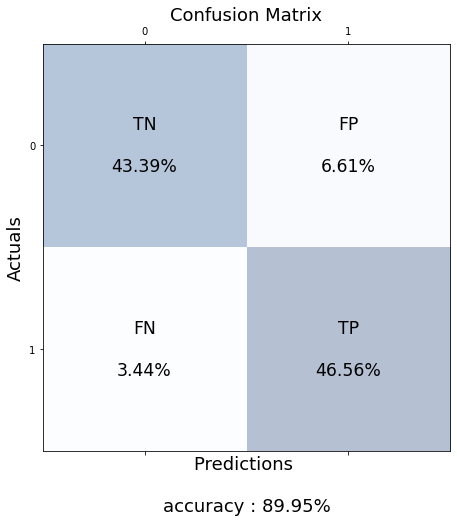

In [221]:
import matplotlib.pyplot as plt 
import seaborn as sns   
group_names = [['TN','FP'],['FN','TP']]
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=group_names[i][j] + "\n\n"+f"{round(100*conf_mat[i, j],2)}%", va='center', ha='center', size='xx-large')
accuracy = round(100*(conf_mat[0, 0]+conf_mat[1, 1]),2)
precision = round(100*conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]),2)
recall = round(100*conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]),2)
f1_score = round(2*(precision*recall)/(precision+recall),2)
#plt.xlabel(f'Predictions \n\naccuracy : {accuracy}\n\n precision : {precision}%\n\nrecall : {recall}%\n\nf1-score : {f1_score}%', fontsize=18)
plt.xlabel(f'Predictions \n\naccuracy : {accuracy}%', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()